In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import funciones_nba_eda
from funciones_nba_eda import *

In [2]:
df = pd.read_csv('DataFrameForEDA.csv')

df.describe()

MP_Home   Tm_FG_Home  Tm_FGA_Home  Tm_FG%_Home   Tm_2P_Home  \
count  3653.000000  3653.000000  3653.000000  3653.000000  3653.000000   
mean    241.553175    41.245041    88.188265     0.468694    28.782553   
std       3.073546     2.783832     3.750498     0.028338     3.276280   
min     240.000000    31.200000    77.800000     0.366600    18.400000   
25%     240.000000    39.200000    85.600000     0.449800    26.400000   
50%     240.000000    41.400000    88.000000     0.468600    28.600000   
75%     240.000000    43.200000    90.600000     0.487600    31.000000   
max     265.000000    51.200000   102.000000     0.563400    40.600000   

       Tm_2PA_Home  Tm_2P%_Home   Tm_3P_Home  Tm_3PA_Home  Tm_3P%_Home  ...  \
count  3653.000000  3653.000000  3653.000000  3653.000000  3653.000000  ...   
mean     53.532713     0.539667    12.462487    34.655553     0.358664  ...   
std       5.545831     0.037551     2.305641     4.613655     0.040665  ...   
min      36.000000     0.418400     6.400000    19.000000     0.229000  ...   
25%      49.600000     0.513800    10.800000    31.200000     0.331000  ...   
50%      53.400000     0.539800    12.400000    34.400000     0.358200  ...   
75%      57.200000     0.565200    14.000000    37.800000     0.386000  ...   
max      73.000000     0.665600    20.200000    50.000000     0.494000  ...   

       GmSc_P1_Away  +/-_P1_Away  TS%_P2_Away  TRB_P2_Away  AST_P2_Away  \
count   3653.000000  3653.000000  3653.000000  3653.000000  3653.000000   
mean      13.132755     0.929353     0.478976     4.924211     3.238936   
std        6.939427     5.864895     0.178733     2.812817     2.110088   
min        0.000000   -23.000000     0.000000     0.000000     0.000000   
25%        9.016000    -2.480000     0.434520     3.160000     1.640000   
50%       13.288000     0.280000     0.531400     4.520000     2.920000   
75%       17.584000     4.800000     0.589280     6.520000     4.600000   
max       37.500000    21.520000     0.830600    14.640000    12.240000   

       PTS_P2_Away  GmSc_P2_Away  +/-_P2_Away      Times_W      Times_L  
count  3653.000000   3653.000000  3653.000000  3653.000000  3653.000000  
mean     15.257589     11.636881     0.860833     2.032576     1.939502  
std       7.664249      6.015333     5.076087     1.947358     1.826664  
min       0.000000     -0.008000   -19.320000     0.000000     0.000000  
25%      10.400000      7.964000    -2.200000     0.000000     0.000000  
50%      15.360000     11.544000     0.300000     2.000000     2.000000  
75%      20.320000     15.504000     4.120000     3.000000     3.000000  
max      40.080000     32.990000    18.960000    11.000000    10.000000  

[8 rows x 106 columns]

Aquí podemos observar que las variables tienen distintas unidades de medida, por lo que debemos normalizar para que el modelo no tome como más o menos relevante una variable basandose en su unidad de medida.

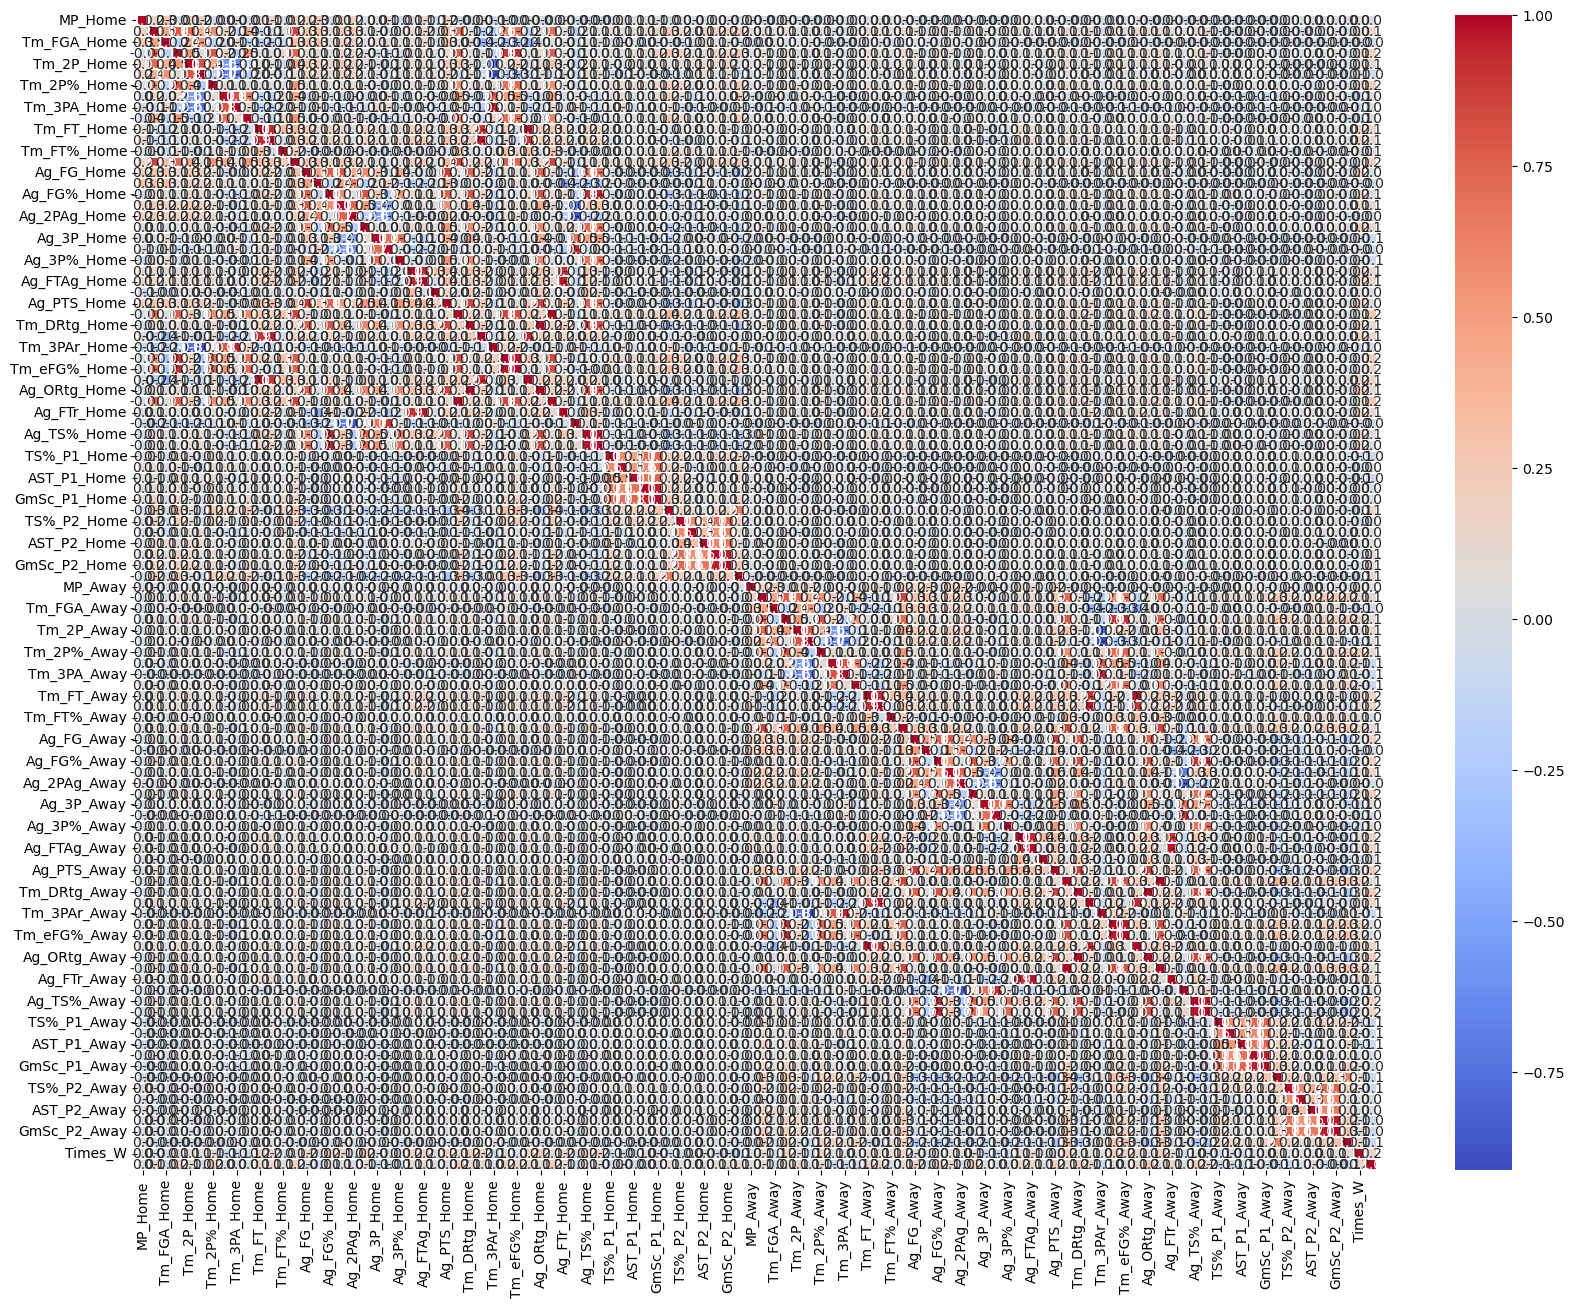

In [3]:
df_num = df._get_numeric_data()

mapa_correlacion(df_num)

Viendo esta Matriz de correlación podemos observar que no tiene sentido unir de esta manera las Stats de Home y Away, y también de Tm y Ag, ya que son el mismo tipo de estadísticas enfrentadas. 
Por lo que vamos a proceder a visualizar las correlaciones de la siguiente manera:

 - 1) Formar un Data Frame que posea información relacionada con ambas columnas (Home-Away) y hacer un mapa de correlación de estas, (para formar este Data Frame vamos a calcular la diferencia entre las columnas enfrentadas).

 - 2) Graficar las correlaciones cruzadas entre las columnas Home y Away, y aunque las estadísticas de un equipo no son el espejo directo del otro, puede proporcionar insights sobre cómo ciertos aspectos del juego de un equipo pueden relacionarse con el desempeño del equipo contrario.

In [4]:
df_diff = make_diff(df)

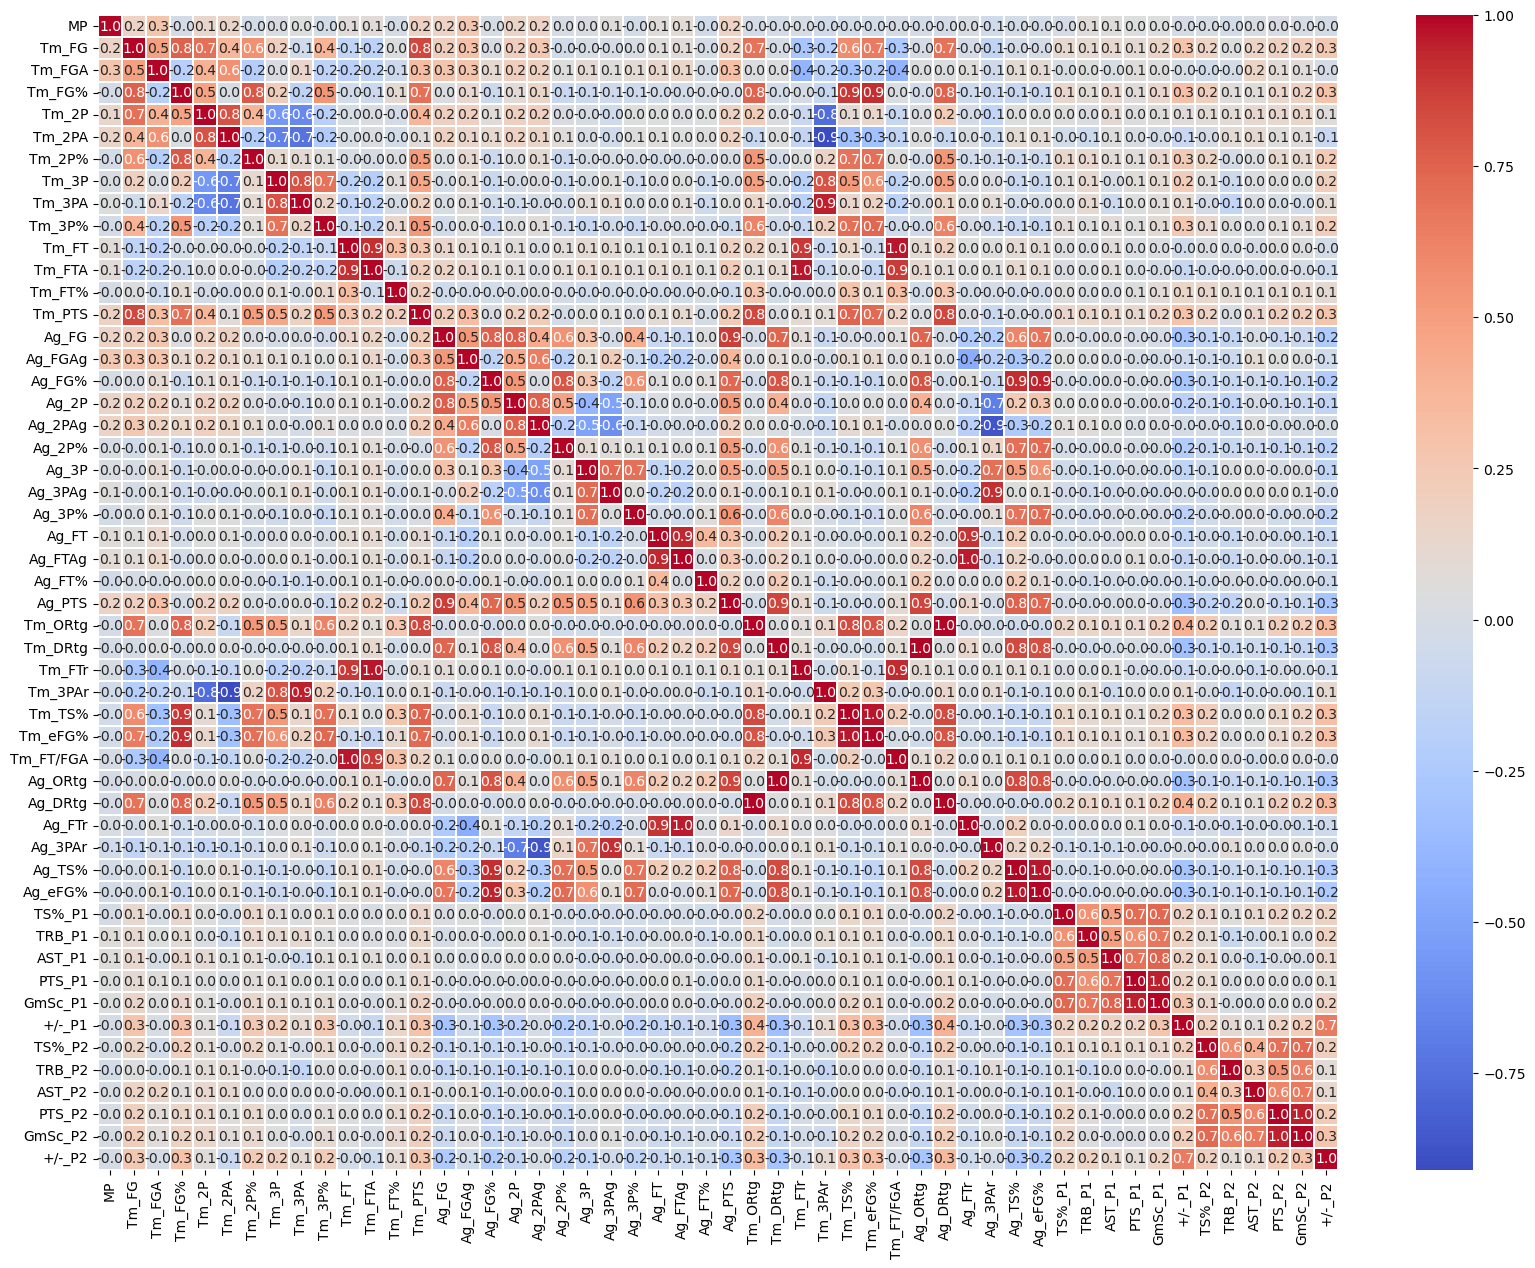

In [5]:
mapa_correlacion(df_diff)

Dado al gran número de variables que hay en este mapa de correlación, vamos a citar las correlaciones con un peso mayor a +/- 0.7

In [6]:
print_most_correlated(df_diff, 0.7)

Variables correlacionadas con un |correlación| >= 0.7:
Tm_FG está correlacionado con Tm_FG% (correlación = 0.76)
Tm_FG está correlacionado con Tm_PTS (correlación = 0.84)
Tm_FG% está correlacionado con Tm_2P% (correlación = 0.79)
Tm_FG% está correlacionado con Tm_PTS (correlación = 0.70)
Tm_FG% está correlacionado con Tm_ORtg (correlación = 0.75)
Tm_FG% está correlacionado con Tm_TS% (correlación = 0.89)
Tm_FG% está correlacionado con Tm_eFG% (correlación = 0.92)
Tm_FG% está correlacionado con Ag_DRtg (correlación = 0.75)
Tm_2P está correlacionado con Tm_2PA (correlación = 0.81)
Tm_2P está correlacionado con Tm_3PAr (correlación = -0.76)
Tm_2PA está correlacionado con Tm_3PA (correlación = -0.74)
Tm_2PA está correlacionado con Tm_3PAr (correlación = -0.91)
Tm_2P% está correlacionado con Tm_eFG% (correlación = 0.71)
Tm_3P está correlacionado con Tm_3PA (correlación = 0.81)
Tm_3P está correlacionado con Tm_3PAr (correlación = 0.80)
Tm_3PA está correlacionado con Tm_3PAr (correlación = 0.

En este listado en su mayoría se encuentran relaciones como:

#### Correlaciones positivas:

 - Aciertos, intentos y porcentaje (por ejemplo, FG, FGA y FG%)(Tm - Tm).
 - Calificación del jugador (GmSc_Pn) con el número de Puntos, Asistencias y Rebotes que este promedia.
 - El porcentaje de True Shooting (TS%) y el porcentaje de efectividad de tiros de campo (eFG%).
 - El rating Ofentsivo (Ortg) con las estadísticas de tiros a canasta en general (por ejemplo, True Shooting).
 - El rating Defensivo (DRtg) con las estadisticas de tiros a canasta del equipo rival.
 - El rating Ofensivo (ORtg) con el rating defensivo (DRtg) del equipo rival, y viceversa.
 
 
#### Correlaciones negativas:

 - Las stats de tiro de 2 con las stats de tiros de 3, y viceversa.

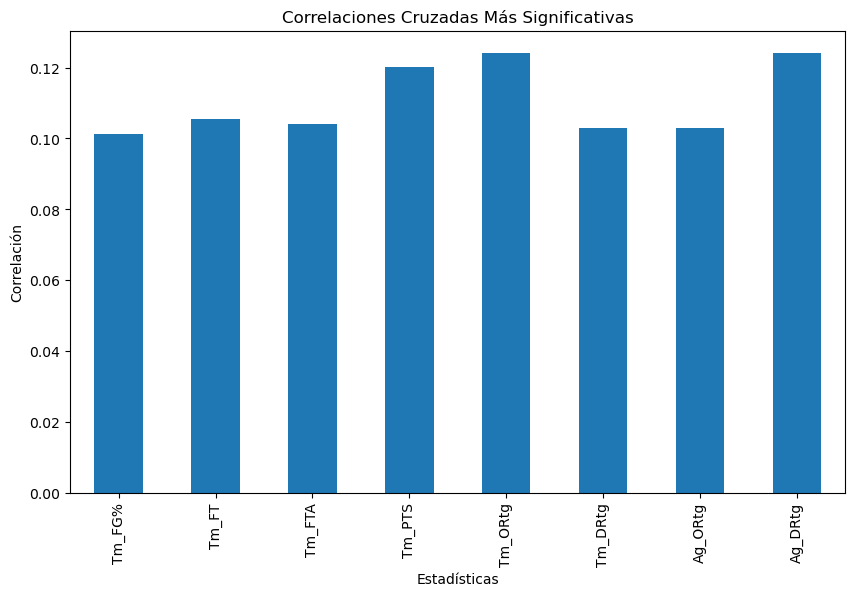

In [7]:
cross_correlation(df, 0.1)

En estre gráfico de correlacion cruzada entre equipos, podemos ver que las correlaciones cruzadas entre ambos dataframes son bastante bajas, aunque no podemos darlo por hecho, podemos pensar que esto se debe a que estos dataframes contienen información de todos los equipos a lo largo de sus filas.

### Graficar Distribuciones de Variables

In [8]:
df['Result']= df['Result'].apply(lambda x: 'W' if 'W' in str(x) else 'L')
df

Home H/A_H        Date Away H/A_A Result           Game_ID  MP_Home  \
0     LAL  Home  2020-12-25  DAL  Away      W  --00122225AADLLL    240.0   
1     DEN  Home  2020-12-25  LAC  Away      L  --00122225ACDELN    265.0   
2     MIA  Home  2020-12-25  NOP  Away      W  --00122225AIMNOP    240.0   
3     BOS  Home  2020-12-25  BRK  Away      L  --00122225BBKORS    240.0   
4     MIL  Home  2020-12-25  GSW  Away      W  --00122225GILMSW    240.0   
...   ...   ...         ...  ...   ...    ...               ...      ...   
3648  OKC  Home  2023-04-09  MEM  Away      W  --00022349CEKMMO    240.0   
3649  NYK  Home  2023-04-09  IND  Away      L  --00022349DIKNNY    240.0   
3650  POR  Home  2023-04-09  GSW  Away      L  --00022349GOPRSW    240.0   
3651  TOR  Home  2023-04-09  MIL  Away      W  --00022349ILMORT    240.0   
3652  MIN  Home  2023-04-09  NOP  Away      W  --00022349IMNNOP    240.0   

      Tm_FG_Home  Tm_FGA_Home  ...  GmSc_P1_Away  +/-_P1_Away  TS%_P2_Away  \
0           38.0         81.0  ...        24.300        -2.20      0.57000   
1           47.0         98.0  ...        10.180        -2.00      0.61280   
2           42.0         83.0  ...         9.480         1.80      0.57920   
3           48.0        101.0  ...        15.420        -2.20      0.53140   
4           46.0         90.0  ...        15.800        -2.40      0.58380   
...          ...          ...  ...           ...          ...          ...   
3648        40.0         90.6  ...         0.000         0.00      0.00000   
3649        44.6         89.0  ...        10.340        -4.59      0.56012   
3650        44.6         92.0  ...        20.456         6.52      0.61976   
3651        43.4         91.8  ...         0.000         0.00      0.00000   
3652        43.2         90.0  ...        12.788         7.84      0.75032   

      TRB_P2_Away  AST_P2_Away  PTS_P2_Away  GmSc_P2_Away  +/-_P2_Away  \
0            2.80         1.40        15.00         9.780        -9.40   
1            5.20         4.40        29.00        22.740        12.80   
2            4.40         3.60        19.20        12.320        -8.60   
3            2.80         6.00        16.80        12.620        -4.20   
4            4.80         0.80         8.20         7.220        -2.40   
...           ...          ...          ...           ...          ...   
3648         0.00         0.00         0.00         0.000         0.00   
3649         4.32         1.24        16.00        10.756        -8.81   
3650         2.88         3.80        23.00        17.140         4.72   
3651         0.00         0.00         0.00         0.000         0.00   
3652         2.48         1.88        20.04        16.936         6.28   

      Times_W  Times_L  
0         0.0      0.0  
1         0.0      0.0  
2         0.0      0.0  
3         0.0      0.0  
4         0.0      0.0  
...       ...      ...  
3648      6.0      3.0  
3649      3.0      7.0  
3650      6.0      3.0  
3651      4.0      5.0  
3652      4.0      6.0  

[3653 rows x 113 columns]

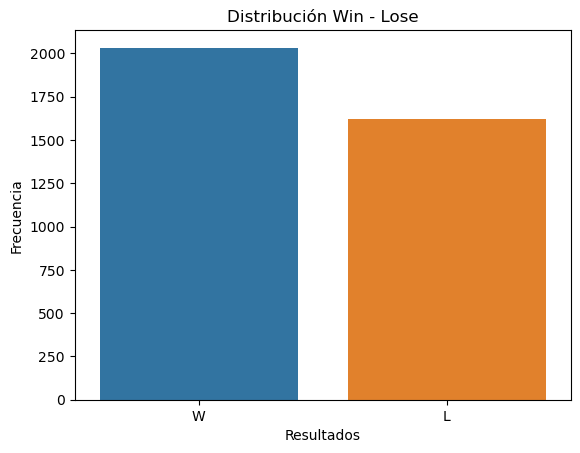

In [9]:
sns.countplot(x='Result', data=df)
plt.xlabel('Resultados')
plt.ylabel('Frecuencia')
plt.title('Distribución Win - Lose')
plt.show()

El número de victorias es mayor que el de derrotas, tenemos unas 1900 victorias frente a 1500 derrotas (approx), esto tiene lógica si presupones que el equipo Local tiende a ganar más, ya que el resultado está visto desde la perspectiva de este.

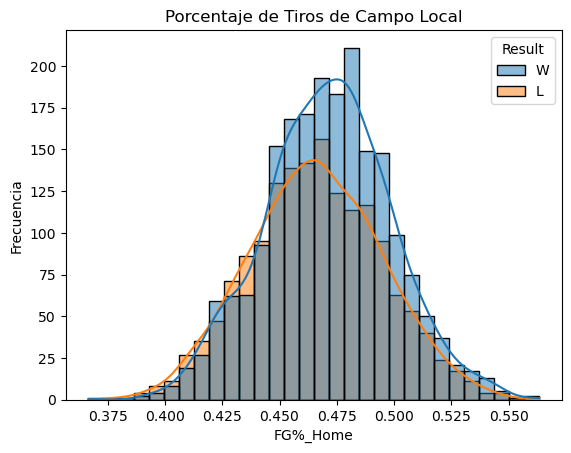

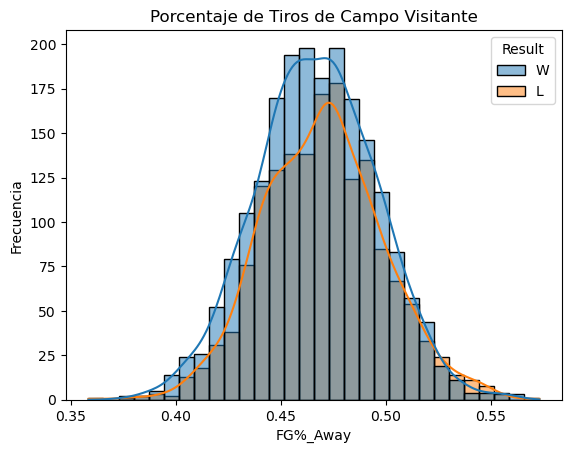

In [10]:
sns.histplot(data=df, x='Tm_FG%_Home', hue='Result', kde=True, bins=30, color='blue')
plt.xlabel('FG%_Home')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de Tiros de Campo Local')
plt.show()

sns.histplot(data=df, x='Tm_FG%_Away', hue='Result', kde=True, bins=30, color='blue')
plt.xlabel('FG%_Away')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de Tiros de Campo Visitante')
plt.show()



Podemos observar que la distribución de los porcentajes de tiro de campo está muy normalizada tanto para los casos de Local como de Visitante, teniendo este último caso menos incertidumbre que el primero por lo que vemos reflejado en el gráfico.

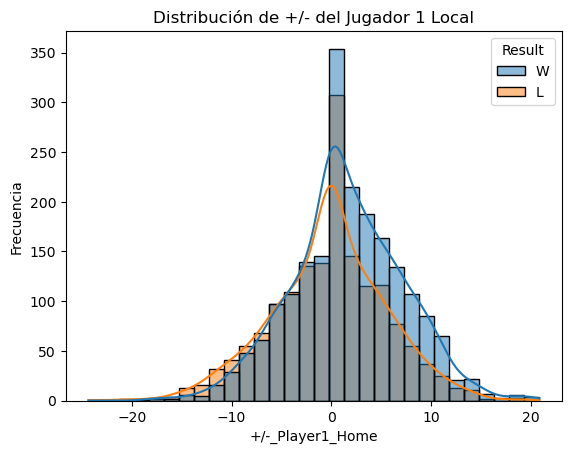

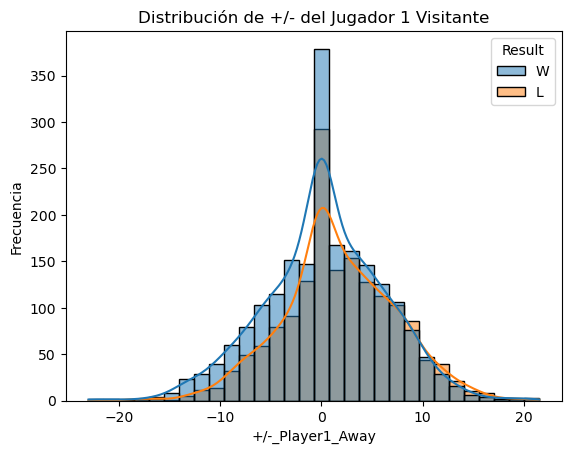

In [11]:
sns.histplot(data=df, x='+/-_P1_Home', hue='Result', kde=True, bins=30, color='blue')
plt.xlabel('+/-_Player1_Home')
plt.ylabel('Frecuencia')
plt.title('Distribución de +/- del Jugador 1 Local')
plt.show()

sns.histplot(data=df, x='+/-_P1_Away', hue='Result', kde=True, bins=30, color='blue')
plt.xlabel('+/-_Player1_Away')
plt.ylabel('Frecuencia')
plt.title('Distribución de +/- del Jugador 1 Visitante')
plt.show()

En este gráfico donde comparamos la distribución del +/- del Player 1 tanto del Local como del visitante comparando los casos de victorias y derrotas (perspectiva del Local). 

Existe un pico en 0, ya que hay varios partidos en los que el Player 1 no pudo jugar en su temporada, aunque este fuese el que más minutos jugó, teniendo en cuenta que esto contempla a todos los equipos cundo jugaron de Local, este número aumenta.

Observamos que en caso del Local la distribución de las derrotas tiende a la izquierda, y en las victorias hacia la derecha. Esto tiene sentido ya que si pierden es más probable que el +/- del Player 1 en el campo sea negativo, y por el contrario, si ganan el +/- sea positivo.

En el caso del Visitante, esto es al revés ya que el resultado tiene la perspectiva del Local, por lo que W sería derrota y L sería victoria para ellos.

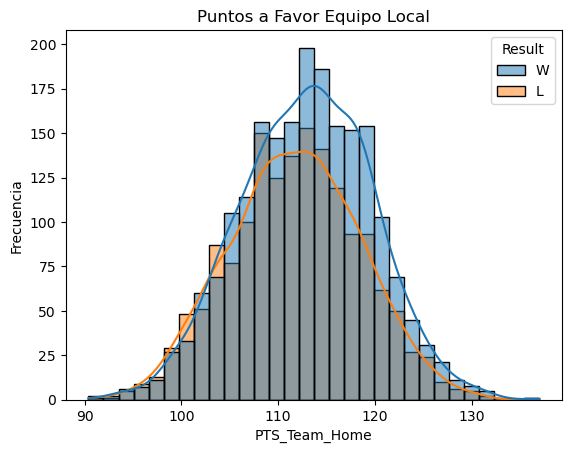

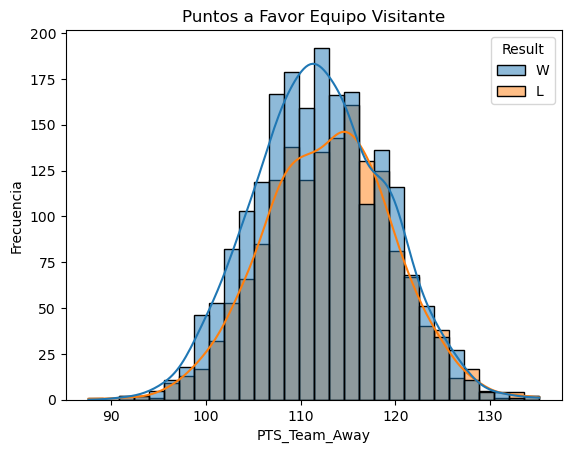

In [12]:
sns.histplot(data=df, x='Tm_PTS_Home', hue='Result', kde=True, bins=30, color='blue')
plt.xlabel('PTS_Team_Home')
plt.ylabel('Frecuencia')
plt.title('Puntos a Favor Equipo Local')
plt.show()

sns.histplot(data=df, x='Tm_PTS_Away', hue='Result', kde=True, bins=30, color='blue')
plt.xlabel('PTS_Team_Away')
plt.ylabel('Frecuencia')
plt.title('Puntos a Favor Equipo Visitante')
plt.show()

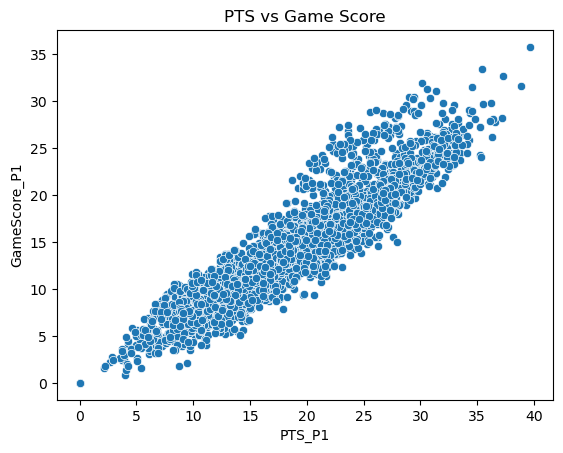

In [13]:
sns.scatterplot(data=df, x='PTS_P1_Home', y='GmSc_P1_Home')
plt.xlabel('PTS_P1')
plt.ylabel('GameScore_P1')
plt.title('PTS vs Game Score')
plt.show()

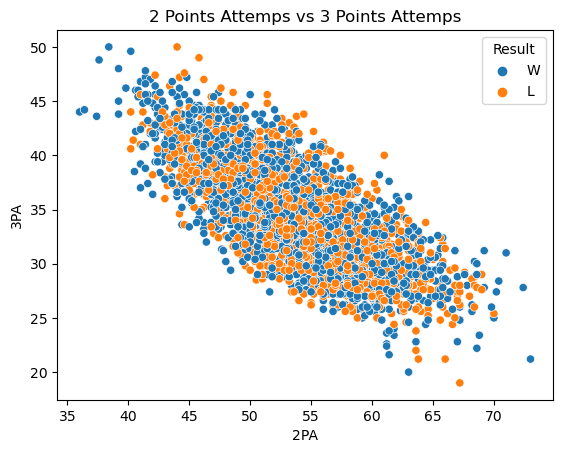

In [14]:
sns.scatterplot(data=df, x='Tm_2PA_Home', y='Tm_3PA_Home', hue='Result')
plt.xlabel('2PA')
plt.ylabel('3PA')
plt.title('2 Points Attemps vs 3 Points Attemps')
plt.show()

Comparando los extremos podemos ver que los equipos que deciden tirar mucho de 3, ganan más que los equipos que deciden tirar mucho de 2. 

Esto puede deberse a que los equipos que toman la decisión de tirar tiros de 3 pts suelen tener jugadores especializados en ello, y al ser tiros que suman más puntos aumentan más el marcador a cada jugada que aciertan.

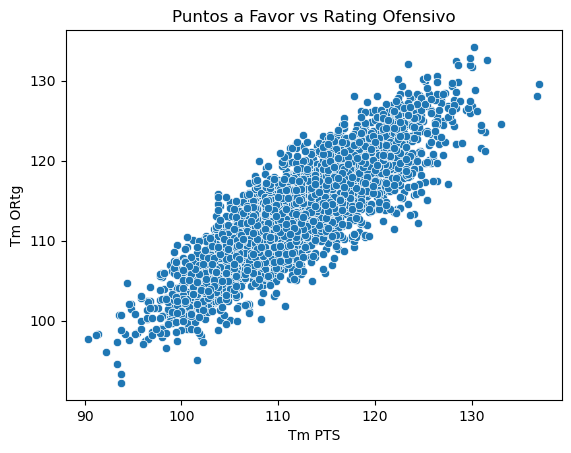

In [15]:
sns.scatterplot(data=df, x='Tm_PTS_Home', y='Tm_ORtg_Home')
plt.xlabel('Tm PTS')
plt.ylabel('Tm ORtg')
plt.title('Puntos a Favor vs Rating Ofensivo')
plt.show()

Relación Lineal entre Puntos a Favor y el Rating Ofensivo es positiva.

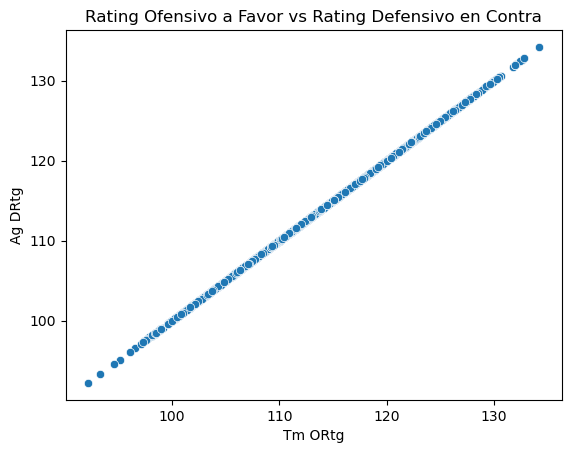

In [16]:
sns.scatterplot(data=df, x='Tm_ORtg_Home', y='Ag_DRtg_Home')
plt.xlabel('Tm ORtg')
plt.ylabel('Ag DRtg')
plt.title('Rating Ofensivo a Favor vs Rating Defensivo en Contra')
plt.show()

Ya que realmente estas dos variables tienen una relación lineal exacta, decidiremos a partir de ahora prescindir de una de ellas con el objetivo de evitar colinealidad en el Data Frame.

Esto también ocurre con Rating Defensivo a Favor y Ofensivo en Contra.

### ELIMINACIÓN DE COLUMNAS CORRELACIONADAS

In [17]:
df = df.drop(columns=['Ag_DRtg_Home','Ag_ORtg_Home','Ag_DRtg_Away','Ag_ORtg_Away'])
df = df.rename(columns={'Tm_DRtg_Home':'DRtg_Home', 'Tm_ORtg_Home':'ORtg_Home',
                       'Tm_DRtg_Away':'DRtg_Away', 'Tm_ORtg_Away':'ORtg_Away'})

df_num = df._get_numeric_data()

In [18]:
print_most_correlated(df_num, 0.9)

Variables correlacionadas con un |correlación| >= 0.9:
Tm_FG%_Home está correlacionado con Tm_eFG%_Home (correlación = 0.92)
Tm_2PA_Home está correlacionado con Tm_3PAr_Home (correlación = -0.91)
Tm_3PA_Home está correlacionado con Tm_3PAr_Home (correlación = 0.95)
Tm_FT_Home está correlacionado con Tm_FTA_Home (correlación = 0.93)
Tm_FT_Home está correlacionado con Tm_FTr_Home (correlación = 0.91)
Tm_FT_Home está correlacionado con Tm_FT/FGA_Home (correlación = 0.97)
Tm_FTA_Home está correlacionado con Tm_FTr_Home (correlación = 0.97)
Ag_FG%_Home está correlacionado con Ag_TS%_Home (correlación = 0.93)
Ag_FG%_Home está correlacionado con Ag_eFG%_Home (correlación = 0.95)
Ag_3PAg_Home está correlacionado con Ag_3PAr_Home (correlación = 0.92)
Ag_FT_Home está correlacionado con Ag_FTAg_Home (correlación = 0.94)
Ag_FT_Home está correlacionado con Ag_FTr_Home (correlación = 0.91)
Ag_FTAg_Home está correlacionado con Ag_FTr_Home (correlación = 0.96)
Tm_FTr_Home está correlacionado con Tm_FT

Debido a que las estadísticas de Attempts (FTA, FGA, 2PA, 3PA) tienen una correlación alta con la mayoría de estadísticas de tiro, esta información ya viene de forma implicítica entre las estadísticas de anotados, porcentajes y ratio (p ej, 3P, 3P%, 3PAr), vamos a tomar la decisión de eliminar estas columnas con el fin de disminuir colinealidad en el modelo.

También vamos a desechar la estadististica de efectividad de tiros de campo (eFG%) ya que contempla la misma estadistica que True Shooting (TS%) solo que esta última incluye también los tiros libres.

In [19]:
df.drop(columns=['Tm_FGA_Home', 'Tm_2PA_Home', 'Tm_3PA_Home', 'Tm_FTA_Home',
                 'Ag_FGAg_Home', 'Ag_2PAg_Home', 'Ag_3PAg_Home', 'Ag_FTAg_Home',
                 'Tm_FGA_Away','Tm_2PA_Away', 'Tm_3PA_Away', 'Tm_FTA_Away',
                 'Ag_FGAg_Away', 'Ag_2PAg_Away', 'Ag_3PAg_Away', 'Ag_FTAg_Away',
                 'Tm_eFG%_Home', 'Tm_eFG%_Away', 'Ag_eFG%_Home', 'Ag_eFG%_Away'], inplace=True)

In [20]:
df_num = df._get_numeric_data()
print_most_correlated(df_num, 0.8)

Variables correlacionadas con un |correlación| >= 0.8:
Tm_FG_Home está correlacionado con Tm_PTS_Home (correlación = 0.85)
Tm_FG%_Home está correlacionado con Tm_TS%_Home (correlación = 0.90)
Tm_FT_Home está correlacionado con Tm_FTr_Home (correlación = 0.91)
Tm_FT_Home está correlacionado con Tm_FT/FGA_Home (correlación = 0.97)
Tm_PTS_Home está correlacionado con ORtg_Home (correlación = 0.85)
Ag_FG_Home está correlacionado con Ag_PTS_Home (correlación = 0.88)
Ag_FG%_Home está correlacionado con Ag_2P%_Home (correlación = 0.81)
Ag_FG%_Home está correlacionado con DRtg_Home (correlación = 0.82)
Ag_FG%_Home está correlacionado con Ag_TS%_Home (correlación = 0.93)
Ag_FT_Home está correlacionado con Ag_FTr_Home (correlación = 0.91)
Ag_PTS_Home está correlacionado con DRtg_Home (correlación = 0.86)
ORtg_Home está correlacionado con Tm_TS%_Home (correlación = 0.85)
DRtg_Home está correlacionado con Ag_TS%_Home (correlación = 0.86)
Tm_FTr_Home está correlacionado con Tm_FT/FGA_Home (correlac

También hemos decidido tirar las siguientes columnas: 
 - PTS ya que tienen una alta correlación con ORtg y FG, además que esta estadística puede apreciarse observando las otras dos.
 
 - TS% ya que tienen una alta correlación con FG% y ORtg y también puede apreciarse observando las otras dos.
 
 - FT/FGA debido a su alta correlación con Tm_FT_Home y Tm_FTr_Home.
 
 - GmSc_P1 y GmSc_P2 debido a que puede entenderse por el resto de estadísticas que promedia AST, TS%, TRBS
 
 - FTr ya que esto puede entenderse con FT y FT%, además de su altisima correlación

In [21]:
df2 = df.drop(columns=['Tm_PTS_Home', 'Tm_PTS_Away', 'Ag_PTS_Home', 'Ag_PTS_Away',
                       'Tm_TS%_Home', 'Tm_TS%_Away', 'Ag_TS%_Home', 'Ag_TS%_Away',
                       'Tm_FT/FGA_Home', 'Tm_FT/FGA_Away', 'Tm_FT/FGA_Home', 'Tm_FT/FGA_Away',
                       'GmSc_P1_Home', 'GmSc_P1_Away', 'GmSc_P2_Home', 'GmSc_P2_Away',
                       'Tm_FTr_Home', 'Tm_FTr_Away', 'Ag_FTr_Home', 'Ag_FTr_Away'])

### CREACIÓN DE COLUMNAS

Incluir estas variables adicionales en nuestro modelo de machine learning nos aporta beneficios cruciales para entender la contribución global, una visión equilibrada de su rendimiento promedio, una revelación la dinámica interna del equipo. 
Estas métricas enriquecen nuestro conjunto de datos, potenciando la precisión predictiva del modelo.

### Diferencia Home - Away

In [22]:
df2_diff = make_diff(df2)
df2 = pd.concat([df2, df2_diff], axis=1)

### Suma de PTS TRB AST de Players (P1_TRB + P1_PTS + P1_AST)

In [23]:
df2 = total_players_stats(df2)

### Media de stats entre P1 y P2 ((P1_TS% + P2_TS%) / 2)

In [24]:
df2 = avg_p1_p2(df2)

### Diferencia entre Players porcentual. (P1-P2 / P1)

In [25]:
df2 = porcentual_diff_players(df2)

### Reemplazo de Valores Nulos por 0

In [31]:
df2 = df2.replace(np.nan, 0).replace(-np.inf, 0).replace(np.inf, 0)

In [32]:
df2.to_csv('DataFrameForModel.csv', index=False)